In [1]:
# 데이터 준비 및 전처리

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [3]:
# 합성곱 신경망 만들기

In [26]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout

model = keras.Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2)) # => 14, 14, 32
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same')) # => 14, 14, 64
model.add(MaxPooling2D(2)) # 7, 7, 64
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

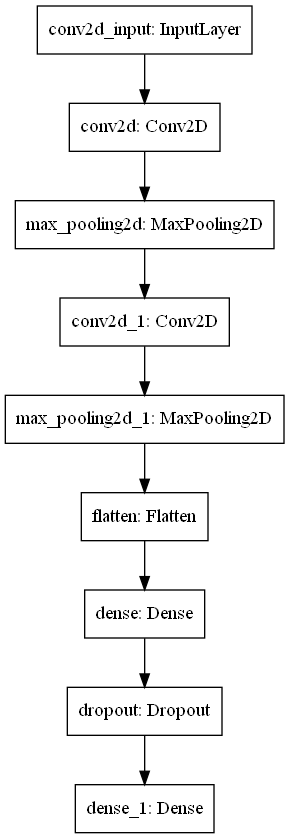

In [5]:
keras.utils.plot_model(model)

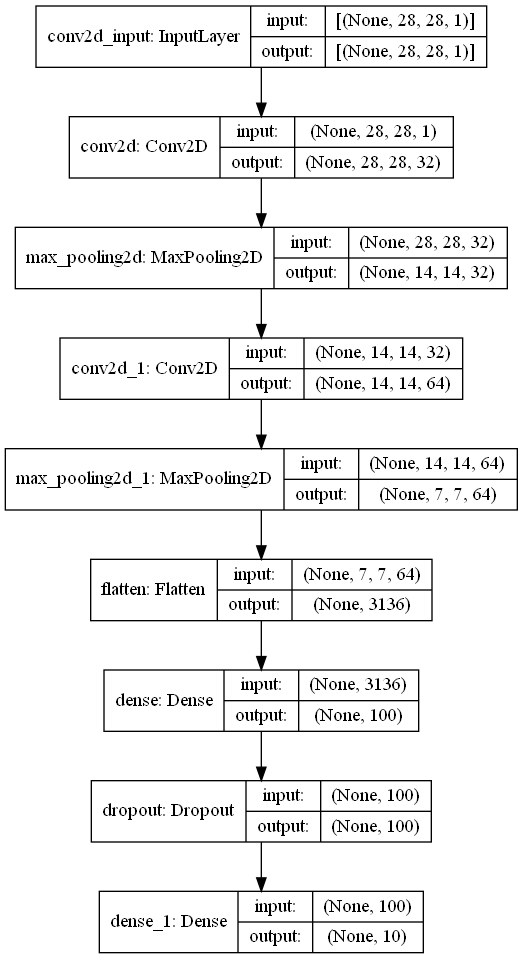

In [6]:
keras.utils.plot_model(model, show_shapes=True)

In [7]:
# 모델 컴파일과 훈련

In [8]:
epochs = 50

In [9]:
from tensorflow.keras import callbacks

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(train_scaled, train_target, 
                    epochs=epochs,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 [==============================] - 7s 3ms/step - loss: 0.7730 - accuracy: 0.7246 - val_loss: 0.3311 - val_accuracy: 0.8761
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3939 - accuracy: 0.8585 - val_loss: 0.2872 - val_accuracy: 0.8936
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3360 - accuracy: 0.8803 - val_loss: 0.2612 - val_accuracy: 0.9025
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2986 - accuracy: 0.8932 - val_loss: 0.2451 - val_accuracy: 0.9089
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2728 - accuracy: 0.9008 - val_loss: 0.2387 - val_accuracy: 0.9103
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2479 - accuracy: 0.9095 - val_loss: 0.2333 - val_accuracy: 0.9136
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2242 - accuracy: 0.9165 - val_loss: 0.2264 - val_accuracy:

In [10]:
# 결과물 시각화

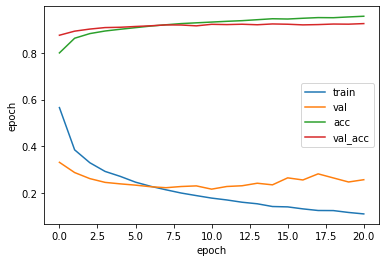

In [12]:
import matplotlib.pyplot as plt

history = history.history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('epoch')
plt.legend(['train', 'val', 'acc', 'val_acc'])
plt.show()

In [13]:
model.evaluate(val_scaled, val_target)


375/375 [==============================] - 1s 1ms/step - loss: 0.2160 - accuracy: 0.9229


[0.21604713797569275, 0.9229166507720947]

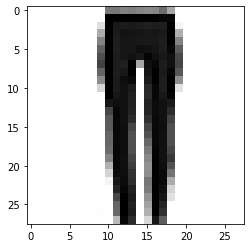

In [15]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [17]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.66310704e-12 1.00000000e+00 1.02722535e-11 2.83725941e-16
  2.04418425e-14 1.12590679e-20 3.33074063e-13 6.09341861e-22
  6.69390379e-19 3.50148300e-20]]


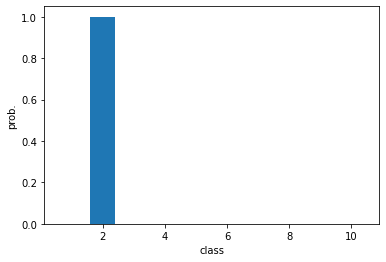

In [18]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [19]:
import numpy as np

In [20]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
print(classes[np.argmax(preds)])

바지


In [21]:
# 모델 테스트

In [23]:
test_scaled = test_input.reshape(-1, 28, 28, 1) /255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2444 - accuracy: 0.9173


[0.24438083171844482, 0.9172999858856201]